# Kapitel 4: Supervised Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from distutils.version import StrictVersion

In [4]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.1


# Lineare Regression auf Boston House Prices (Schritt 1)

In [5]:
import sklearn.datasets as data
boston = data.load_boston()
boston.data.shape, boston.target.shape

((506, 13), (506,))

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
# Spalte 5 beinhaltet die durschnittliche Zimmerzahl der Häuser in einem Bezirk
# target ist der Median der Hauspreise in diesem Bezirk

# Wir wollen die Abhängigkeit der Hauspreise von der Größe untersuchen

X = boston.data[:, 5:6]   # schneidet aus dem numpy-array die 5. bis zur 6. Spalte ohne die 6. Spalte --> try: 4:9
y = boston.target

In [8]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [9]:
# Wir plotten den Hauspreis als Funktion der Zimmeranzahl, um anhand des Bildes zu erkennen, 
# ob es einen funktionellen Zusammenhang gibt. Man erwartet einen Zusammenhang, da Häuser mit 
# mehr Zimmer auch mehr kosten sollten. Man könnte ein lineares Verhalten vermuten und dann
# eben auch eine Gerade erraten und reinzeichnen.

Text(0,0.5,'Preis ($1000)')

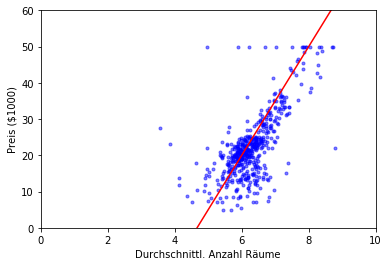

In [10]:
import matplotlib.pyplot as plt

a = 15.; b = -70.      # erratene Werte
lx = np.arange(4,10)   # erzeugt array [4,5,6,7,8,9] 
lguess = a*lx + b      # erzeugt array mit den geschätzen Preisen für die Zimmergrößen aus lx

plt.plot(lx, lguess, c='red')
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.xlim(0, 10) 
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

In [11]:
lx

array([4, 5, 6, 7, 8, 9])

In [12]:
X.shape

(506, 1)

In [13]:
# Wie kommt man nun zu der besten Abschätzung für eine solche Gerade ? 
# Was bedeutet hier eigentlich gut oder beste ?

## Ordinary Least Square (Schritt 2)

In [14]:
import sklearn.linear_model as lm
lr = lm.LinearRegression()              # Regressor Instanz
lr.fit(X, y)                            # Training des Regressors mit den Daten

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
lr.score(X, y)                          # Validierung

0.4835254559913343

In [16]:
y_pred = lr.predict(X)                  # y-Werte mittels des optimierten Models ermitteln

In [17]:
y_pred.shape

(506,)

Text(0,0.5,'Preis ($1000)')

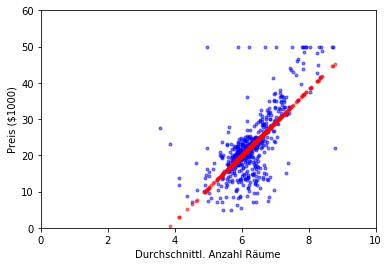

In [18]:
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')         # plottet Targets versus X
plt.scatter(X, y_pred, marker='.', alpha=0.5, color='red')     # plottet ermittelte y-Werte versus x
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

In [19]:
# Alternativer Aufruf den wir bei kNN nutzen
from sklearn import linear_model as lm
lr = lm.LinearRegression()              # Regressor Instanz
lr.fit(X, y)     

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Stochastic Gradient Descent (Schritt 3)

In [20]:
lr = lm.SGDRegressor()
lr.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [21]:
lr.score(X, y)

0.3213311365381597

Text(0,0.5,'Preis ($1000)')

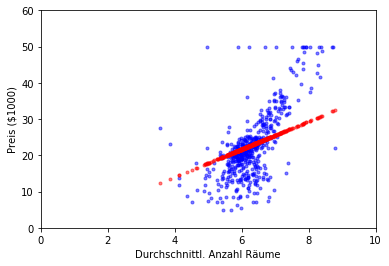

In [22]:
pred = lr.predict(X)
plt.scatter(X, y, marker='.', alpha=0.5, color='blue')
plt.scatter(X, pred, marker='.', alpha=0.5, color='red')
plt.xlim(0, 10)
plt.ylim(0, 60)
plt.xlabel('Durchschnittl. Anzahl Räume')
plt.ylabel('Preis ($1000)')

In [23]:
# lr = lm.SGDRegressor(n_iter=10000)
# lr.fit(X, y)

In [24]:
lr = lm.SGDRegressor(max_iter=10000)
lr.fit(X, y)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [25]:
lr.score(X, y)

0.48346164540856457

## Logistische Regression (Schritt 4)

Text(0,0.5,'y')

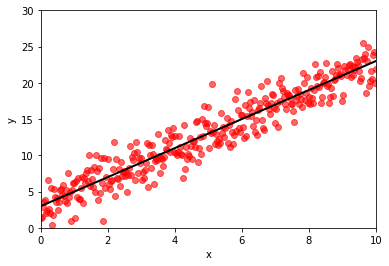

In [26]:
# Ein Beispiel für lineare Regression anhand zufällig erzeugter Daten bzw. Erzeugung von Daten um eine Gerade herum

import numpy as np
import matplotlib.pylab as plt

def line(a, b, x):
    return a*x+b

x = np.linspace(0, 10) # erzeugt ein array von 50 Werten zwischen 0 und 10
a = 2; b = 3
y = line(a, b, x)

size = 333
x_sample = np.linspace(0, 10, size)   # erzeugt ein array von 333 Werten (entspricht size) zwischen 0 und 10
y_sample = a * x_sample + b + np.random.normal(loc=0, scale=2, size=size)

plt.scatter(x_sample, y_sample, marker='o', alpha=0.6, c='r')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

In [27]:
# jetzt werden Daten erzeugt, die in der gesamten Ebene liegen und dazu jeweils ein y Wert
# np.random.uniform(size=size)) gibt zufällige Werte (Anzahl = size) zwischen 0 und 1 mit Gleichverteilung

# setting to -1 is to mark that it is not a good data point --> won't be shown later

# Achtung: Hier werden jetzt auch überlappende Daten erzeugt ! Das geht nämlich dann auch !

size = 1000
x_sample = np.linspace(0, 10, size)
x_class = np.linspace(0, 10, size)
y_class0 = np.array([r if r <= line(a, b, x) + 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])
y_class1 = np.array([r if r >= line(a, b, x) - 3 else -1 for x,r in zip(x_sample, 30 * np.random.uniform(size=size))])

In [28]:
y_class1

array([20.037441  , 26.41510284, 22.5997064 ,  7.29688955, 20.69597957,
        3.43942066, 26.87326461, 19.29289356,  7.37963668,  4.06316781,
        1.4399788 , 11.92628163, 15.00496299, 11.90272655, 15.13472197,
        4.28295157, 15.58470797, 20.80808326, 12.89505615, 14.65965455,
       28.28203647, 11.16845133,  7.75740345, 13.41005943, 26.79749105,
       13.79356   , 27.16790625, 26.11157055,  7.95907531, 16.51353517,
       29.82466085, 25.03879109,  3.31544136,  1.6237012 ,  1.38184492,
       25.03288183, 18.48376525, 29.38378949, 16.33736056,  9.08316895,
        8.85861964, 25.98555628,  6.70859281, 18.59810861, 18.90305713,
        8.66438518, 22.68664957, 20.7829059 , 18.59699602,  8.78036861,
       15.09374912, -1.        , 14.65034764, 16.40352488, 22.02389   ,
        8.99034761,  5.73849629,  3.32322653,  4.67024905, 10.03995919,
       -1.        , 29.07592974,  9.7330984 ,  3.71628239, 25.18612103,
       18.87504552, 27.04835719,  5.27116856, 23.21876069, -1.  

Text(0,0.5,'y')

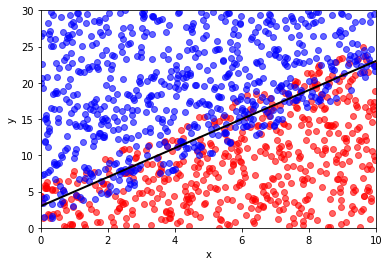

In [29]:
plt.scatter(x_class[:len(y_class0)], y_class0, 	marker='o',alpha=0.6, c='r')
plt.scatter(x_class[:len(y_class1)], y_class1, 	marker='o',alpha=0.6, c='b')
plt.plot(x, y, c='k', lw=2.)
plt.xlim(0, 10); plt.ylim(0, 30)
plt.xlabel('x'); plt.ylabel('y')

Text(0,0.5,'y')

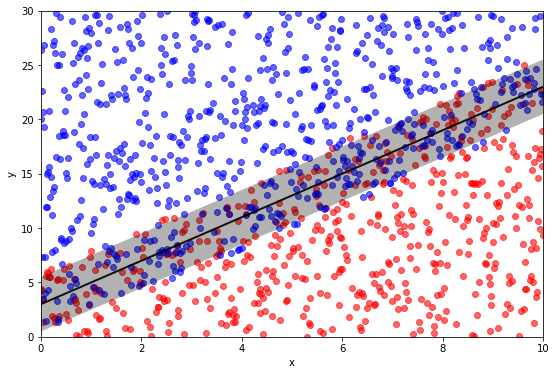

In [30]:
fig = plt.figure(1, figsize=(9, 6))

plt.scatter(x_class,y_class0, marker='o',alpha=0.6, c='r')
plt.scatter(x_class,y_class1, marker='o',alpha=0.6, c='b')
plt.plot(x,y, c='k',lw=50.,alpha=0.3) # fat transparent line over opaque regression line # ist Linie der Breite 50
plt.plot(x,y, c='k',lw=2.,alpha=0.9) # regression line
plt.xlim(0,10)
plt.ylim(0,30)
plt.xlabel('x')
plt.ylabel('y')

[ 32  35  42  55  62  68  80  88  98 108 114 124 134 145 147 141 103  76
  76  66  71  72  43  10   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 14  6 12 43 81 93 96 83 52 64
 78 73 73 76 80 79 59 45 33 29 40 39 29 27 24 23]


(0, 1.01)

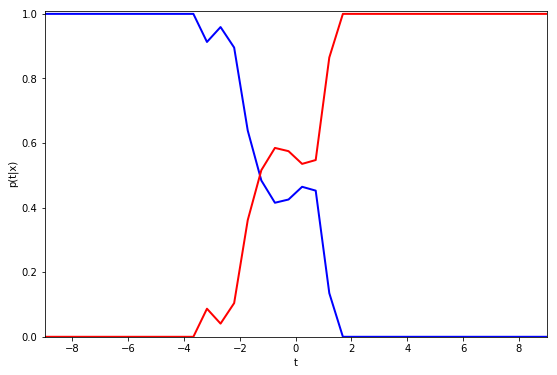

In [31]:
# etwas Mathe um die Dichte von Blau bzw. Rot als Funktion von t (= Abstand von der Geraden) zu bestimmen

import math
from numpy.linalg import norm

tsize = 40 
t_sample = np.linspace(-10,9,tsize)
t_sample2 = t_sample + 1
def sign_(x,y,a,b): 
    if y > a*x+b:
        return 1
    else:
        return -1

def get_label_bin_p(d0,d1,a,b,x_class,y_class0,y_class1):
    pref1 = np.array([-10,a*(-10)+b])
    pref2 = np.array([10,a*10 + b])
    count_0 = 0
    count_1 = 0
    for ic,xc in enumerate(x_class):
        p3_0 = np.array([xc,y_class0[ic]])
        p3_1 = np.array([xc,y_class1[ic]])
        dc0 = norm(np.cross(pref2-pref1, pref1-p3_0))/norm(pref2-pref1)
        dc1 = norm(np.cross(pref2-pref1, pref1-p3_1))/norm(pref2-pref1)
        dc0_s = sign_(xc,y_class0[ic],a,b)
        dc1_s = sign_(xc,y_class1[ic],a,b)
        dc0 = dc0 * dc0_s
        dc1 = dc1 * dc1_s
        if dc0<d1 and dc0>d0:
            count_0 += 1
        if dc1<d1 and dc1>d0:
            #print(p3_1,dc1,dc1_s)
            count_1 += 1
    return count_0,count_1

p_0 = []
p_1 = []
for it,ts in enumerate(t_sample):
    c0,c1 = get_label_bin_p(ts,t_sample2[it],a,b,x_class,y_class0,y_class1)
    p_0.append(c0)
    p_1.append(c1)
p_0 = np.array(p_0)
p_1 = np.array(p_1)
p_1[:14] = 0
print(p_0)
print(p_1)

fig = plt.figure(1, figsize=(9, 6))

plt.plot(t_sample,p_0/(p_0+p_1), c='b',lw=2.)
plt.plot(t_sample,p_1/(p_0+p_1), c='r',lw=2.)
plt.xlabel('t')
plt.ylabel('p(t|x)')
plt.xlim(-9,9)
plt.ylim(0,1.01)

Text(0,0.5,'p(t|x)')

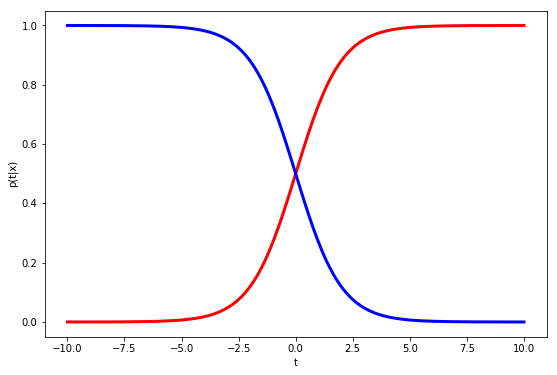

In [32]:
# Sigmoid Funktion als Alternative Beschreibung

def logf(t):
    return 1./(1 + np.exp( -t ))


# In[33]:

fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='r')
plt.plot(t,1-logf(t),lw=3.,c='b')
plt.xlabel('t')
plt.ylabel('p(t|x)')

Text(0,0.5,'logistic function(t)')

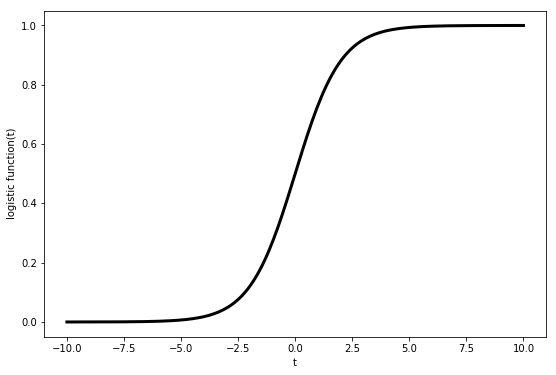

In [33]:
fig = plt.figure(1, figsize=(9, 6))

t = np.linspace(-10,10,200) 
plt.plot(t,logf(t),lw=3.,c='K')
plt.xlabel('t')
plt.ylabel('logistic function(t)')

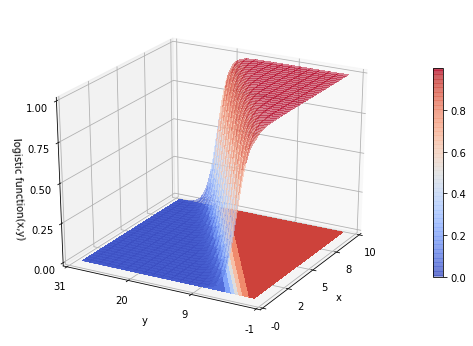

In [34]:
# etwas python um das 3D Bild zu erzeugen ! 

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#import seaborn as sns

fig = plt.figure()
ax = fig.gca(projection='3d')

def logf_z(p,q,X,Y):
    return (1./(1. + np.exp( -(p*X + q)  + Y )))
    
X = np.arange(0, 10., 0.1)
Y = np.arange(0., 30., 0.1)
X, Y = np.meshgrid(X,Y)

#Z = 1-logf_z(2,3,X,Y)
Z = logf_z(2,3,X,Y)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,  rstride=16, cstride=3, alpha=0.5,
                       linewidth=0, antialiased=False)


ax.set_zlim(0., 1.0)
ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('logistic function(x,y)')

ax.xaxis.set_major_locator(LinearLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.00f'))
ax.yaxis.set_major_locator(LinearLocator(4))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.00f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.64, aspect=20)

cset = ax.contourf(X, Y, Z, zdir='z', offset=0.001, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='x', offset=-10, cmap=cm.coolwarm)
#cset = ax.contourf(X, Y, Z, zdir='y', offset=30, cmap=cm.coolwarm)

#nsample = 1000
#ax.scatter(x_class[0:nsample],y_class0[0:nsample], marker='.',alpha=0.9, c='b')
#ax.scatter(x_class[0:nsample],y_class1[0:nsample], marker='.',alpha=0.9, c='g')

ax.view_init(25, -151)

plt.gcf().subplots_adjust(left=-0.25)
plt.gcf().subplots_adjust(bottom=-0.25)
#plt.xlabel('x')
#plt.ylabel('y')

In [35]:
# jetzt kommt die logistische Regression als Tool in sklearn

import sklearn.linear_model as lm
logr = lm.LogisticRegression()

In [36]:
# jetzt muss man die Daten wieder vergewohltätigen, um das richtige Format für sklearn zu haben

# unfortunately a bit complex to constrcut X
x1 = np.append(x_class[y_class0>=0], x_class[y_class1>=0])
x2 = np.append(y_class0[y_class0>=0], y_class1[y_class1>=0])
X = np.array([x1, x2]).T

# 0 is for class0, 1 for class1
y = np.append(np.zeros(len(y_class0[y_class0>=0])), np.ones(len(y_class1[y_class1>=0])))

In [37]:
logr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
logr.score(X, y)

0.8308457711442786

## Logistische Regression der Irisdaten

In [39]:
from sklearn.datasets import load_iris
iris = load_iris()

X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [40]:
import sklearn.linear_model as lm 
logr = lm.LogisticRegression()
logr.fit(X,y)
logr.score(X,y)

0.96

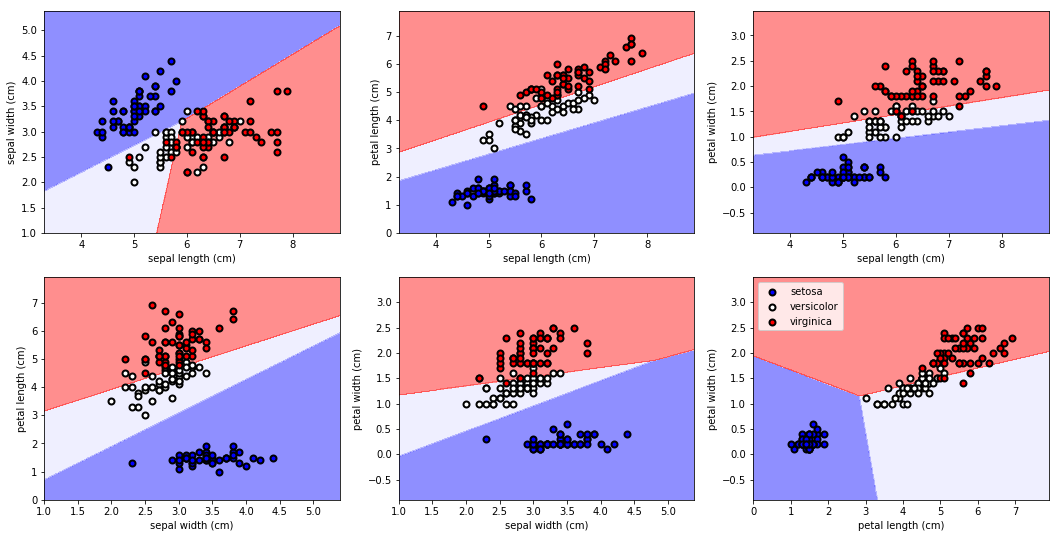

In [41]:
# da man dem Ding nix ansieht, muss man sich hier was überlegen
# man kann jeweils im zwei Features nehmen und damit eben mal 'ne logarithmische Regression versuchen'

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = logr.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')

In [42]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [43]:
for pair in [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]:
    X = iris.data[:, pair]
    y = iris.target

    logrfit = logr.fit(X, y)
    print(logr.score(X, y))

0.7666666666666667
0.9266666666666666
0.9066666666666666
0.9266666666666666
0.9466666666666667
0.8733333333333333
